In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
train_data = pd.read_excel(r"/Users/sudeince/Desktop/data science/Flight_Price_resources/Data_Train.xlsx")

In [27]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [28]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [34]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [36]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [38]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [40]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [42]:
train_data.dropna(inplace=True)

In [44]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [46]:
data = train_data.copy()

In [48]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [50]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [52]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [54]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [56]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [58]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey' ]:
    change_into_Datetime(feature)

In [60]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [62]:
data['Date_of_Journey'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10682, dtype: int32

In [64]:
data['Date_of_Journey'].dt.month

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Date_of_Journey, Length: 10682, dtype: int32

In [66]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [68]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [70]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [72]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-06 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-06 05:50:00,2024-09-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-06 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [74]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] =df[col].dt.minute
    return df.head(3)

In [76]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [78]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-06 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-06 05:50:00,2024-09-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-06 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [80]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-06 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-06 05:50:00,2024-09-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-06 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [82]:
cols_to_drop = ['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop , axis=1 , inplace=True)

In [84]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [86]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
        
    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"  

    else: 
        return "Late Night"

In [88]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [90]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

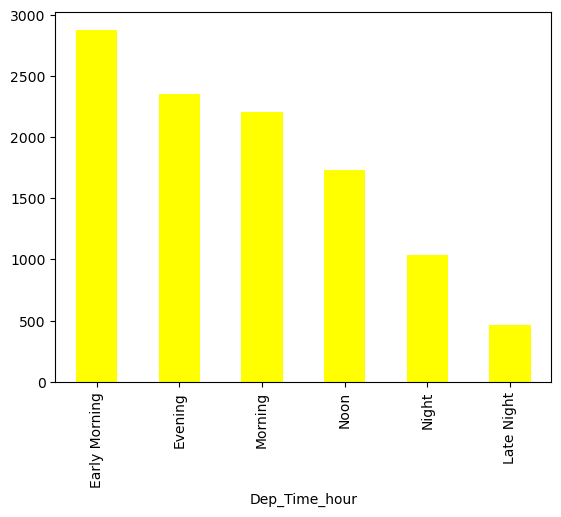

In [92]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color ="yellow")

In [94]:
!pip install plotly
!pip install chart_studio

In [95]:
!pip install cufflinks

In [96]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

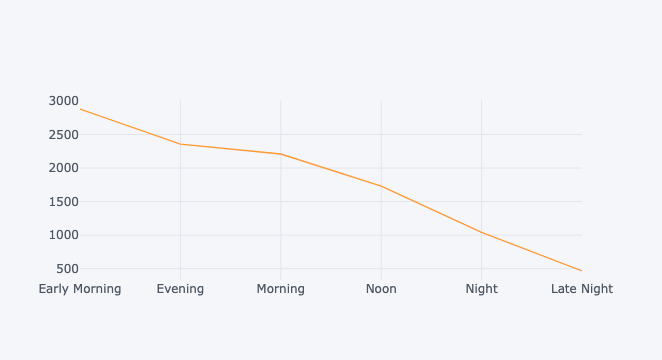

In [97]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot()

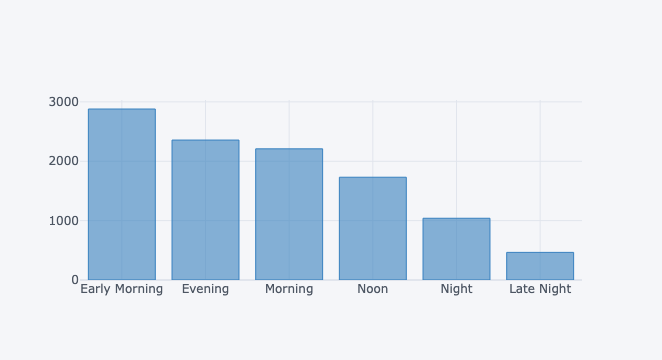

In [98]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar" , color="blue")

In [99]:
def preprocess_duration(x):
    if 'h' not in x: 
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m' 
    return x

In [100]:
data['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [101]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [102]:
data['Duration'] 

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [103]:
data['Duration'][0]

'2h 50m'

In [104]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [105]:
data['Duration_hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10682, dtype: int64

In [106]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [108]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,2
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,7


In [109]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' , '*60').str.replace(' ' ,  '+').str.replace('m', '*1').apply(eval)

In [110]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [111]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

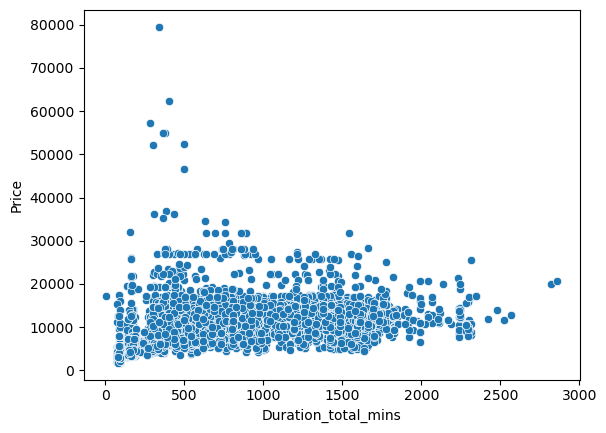

In [112]:
sns.scatterplot(x="Duration_total_mins", y = "Price" , data = data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

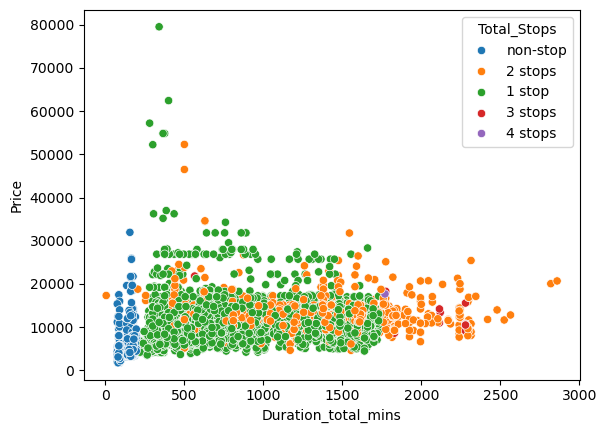

In [114]:
sns.scatterplot(x="Duration_total_mins", y = "Price" , hue="Total_Stops", data = data)

In [123]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [131]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').count()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [134]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values()

Route
DEL → CCU → BOM → COK      1
BOM → DED → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BLR → BOM → JDH → DEL      3
CCU → BOM → PNQ → BLR      4
BOM → DEL → HYD            5
DEL → UDR → BOM → COK      7
BLR → BDQ → DEL            8
BLR → MAA → DEL           10
DEL → IXC → BOM → COK     13
DEL → MAA → BOM → COK     16
CCU → GAU → BLR           22
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → COK                 34
DEL → ATQ → BOM → COK     38
DEL → NAG → BOM → COK     61
DEL → IDR → BOM → COK     86
DEL → AMD → BOM → COK    141
BOM → HYD                207
DEL → JAI → BOM → COK    207
CCU → DEL → BLR          300
BLR → DEL                382
BLR → BOM → DEL          385
DEL → BOM → COK          875
CCU → BOM → BLR          930
dtype: int64

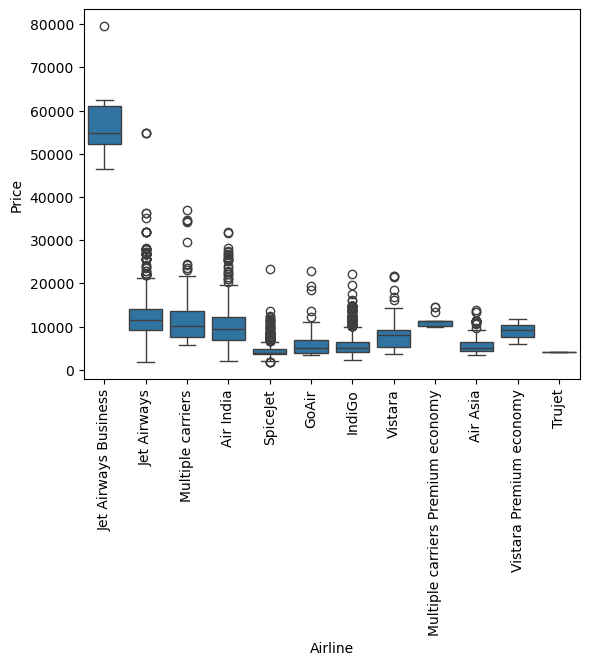

In [137]:
sns.boxplot(y='Price' , x='Airline', data =data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [140]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [142]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [144]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [146]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [148]:
data['Source'].apply(lambda x : 1 if x =='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [150]:
for sub_category in data ['Source'].unique():
    data['Source'].apply(lambda x : 1 if x ==sub_category else 0)

In [152]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,2,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,7,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,19,1140


In [154]:
for sub_category in data ['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x ==sub_category else 0)

In [156]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,2,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,7,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0


In [158]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [160]:
data['Airline'].nunique()

12

In [162]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [164]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [166]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [168]:
dict_airlines = {key:index for index, key in enumerate(airlines, 0)}

In [170]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [172]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [174]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [176]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,2,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,7,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0


In [178]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [180]:
data['Destination'].replace('New Delhi', 'Delhi' , inplace=True)

In [182]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [184]:
data.groupby(['Destination'])['Price'].mean().sort_values()

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         8017.464269
Banglore      9158.389411
Cochin       10540.113536
Name: Price, dtype: float64

In [186]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [188]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [190]:
dict_dest = {key:index for index, key in enumerate(dest,0)}

In [192]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [194]:
data['Destination'] = data['Destination'].map(dict_dest)

In [196]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [198]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,2,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,7,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0


In [200]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [202]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3 , '4 stops':4}

In [204]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [206]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,2,170,1,0,0,0,0


In [208]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [210]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [212]:
data.drop(columns = ['Date_of_Journey', 'Additional_Info', 'Duration_total_mins','Source'] , axis =1 , inplace=True )

In [214]:
data['Journey_year'].unique()

array([2019], dtype=int32)

In [216]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [218]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,2019,22,20,1,10,2,2,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,2019,5,50,13,15,7,7,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,2019,9,25,4,25,19,19,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,2019,18,5,23,30,5,5,0,1,0,0,0


In [220]:
data.drop(columns=['Route'], axis=1, inplace=True)

In [222]:
data.head(5)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,2019,22,20,1,10,2,2,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,2019,5,50,13,15,7,7,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,2019,9,25,4,25,19,19,0,0,1,0,0
3,3,3,5h 25m,1,6218,12,5,2019,18,5,23,30,5,5,0,1,0,0,0
4,3,2,4h 45m,1,13302,1,3,2019,16,50,21,35,4,4,1,0,0,0,0


In [224]:
def plot(df, col):
    fig , (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax =ax1)
    sns.boxplot(df[col] , ax =ax2)
    sns.distplot(df[col] , ax =ax3 , kde=False)


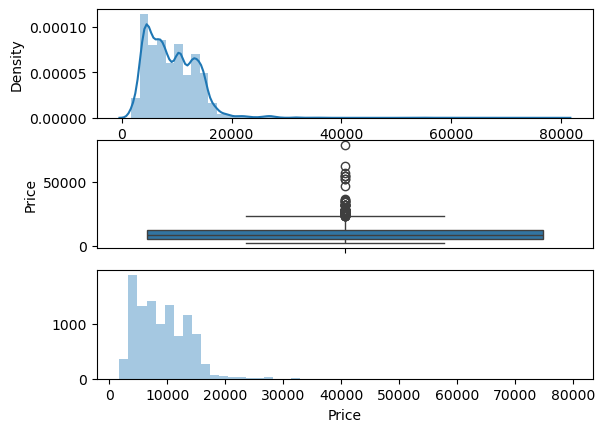

In [226]:
plot(data, 'Price')

In [227]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1 

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [230]:
print(maximum)

23017.0


In [232]:
print(minimum)

-5367.0


In [234]:
print([price for price in data['Price'] if price > maximum or price< minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [236]:
len([price for price in data['Price'] if price > maximum or price< minimum])

94

In [238]:
data['Price'] = np.where(data['Price'] > 35000, data['Price'].median() , data['Price'])

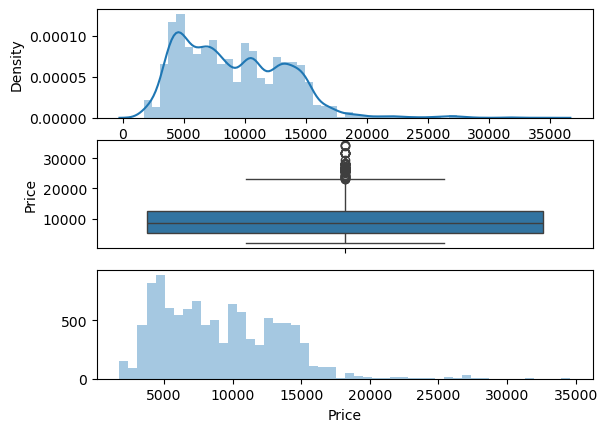

In [240]:
plot(data, 'Price')

In [241]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897.0,24,3,2019,22,20,1,10,2,2,1,0,0,0,0
1,7,3,7h 25m,2,7662.0,1,5,2019,5,50,13,15,7,7,0,1,0,0,0
2,10,4,19h 0m,2,13882.0,9,6,2019,9,25,4,25,19,19,0,0,1,0,0


In [244]:
X = data.drop(['Price'] , axis=1)

In [246]:
y = data['Price']

In [248]:
X = data.drop(['Duration'] , axis=1)

In [250]:
from sklearn.feature_selection import mutual_info_regression

In [252]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897.0,24,3,2019,22,20,1,10,2,2,1,0,0,0,0
1,7,3,7h 25m,2,7662.0,1,5,2019,5,50,13,15,7,7,0,1,0,0,0
2,10,4,19h 0m,2,13882.0,9,6,2019,9,25,4,25,19,19,0,0,1,0,0


In [254]:
imp = mutual_info_regression(X,y)

In [255]:
imp

array([1.31281431, 1.04596695, 0.78796045, 6.26545515, 0.36523224,
       0.63973337, 0.        , 0.93351486, 0.76682295, 1.13945058,
       0.90244269, 1.12647189, 1.11705315, 0.39690647, 0.45394393,
       0.52572588, 0.14036428, 0.20082176])

In [256]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [260]:
imp_df.columns = ['Importance']

In [262]:
imp_df

,Importance
Airline,1.312814
Destination,1.045967
Total_Stops,0.787960
Price,6.265455
Journey_day,0.365232
Journey_month,0.639733
Journey_year,0.000000
Dep_Time_hour,0.933515
Dep_Time_minute,0.766823
Arrival_Time_hour,1.139451


In [264]:
imp_df.sort_values(by='Importance', ascending=False)

,Importance
Price,6.265455
Airline,1.312814
Arrival_Time_hour,1.139451
Duration_hours,1.126472
Duration_mins,1.117053
Destination,1.045967
Dep_Time_hour,0.933515
Arrival_Time_minute,0.902443
Total_Stops,0.787960
Dep_Time_minute,0.766823


In [266]:
from sklearn.model_selection import train_test_split

In [268]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [270]:
from sklearn.ensemble import RandomForestRegressor

In [272]:
ml_model = RandomForestRegressor()

In [274]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [275]:
y_pred = ml_model.predict(X_test)

In [276]:
y_pred

array([16709.71,  4958.85,  9187.58, ...,  3419.  ,  5796.54,  6817.78])

In [277]:
from sklearn import metrics 

In [278]:
metrics.r2_score(y_test, y_pred)

0.9999726050241599

In [279]:
!pip install pickle-mixin

In [280]:
import pickle

In [286]:
file =open(r'/Users/sudeince/Desktop/data science/Flight_Price_resources/rf_random.pkl' , 'wb')

In [287]:
pickle.dump(ml_model , file)

In [316]:
model = open(r'/Users/sudeince/Desktop/data science/Flight_Price_resources/rf_random.pkl' , 'rb')

In [318]:
forest = pickle.load(model)

In [325]:
y_pred2 = forest.predict(X_test)

In [327]:
metrics.r2_score(y_test, y_pred2)

0.9999726050241599

In [329]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [331]:
mape(y_test, y_pred)

0.019737976516333182

In [334]:
from sklearn import metrics

In [338]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score: {}'.format(model.score(X_train , y_train)))
    y_prediction =model.predict(X_test)
    print('Predictions are: {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test , y_prediction)))
    print('MSE score: {}'.format(metrics.mean_squared_error(y_test , y_prediction)))
    print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_prediction))))
    print('MAPE score: {}'.format(mape(y_test , y_prediction)))
    sns.distplot(y_test - y_prediction)

Training score: 0.999994352592283
Predictions are: [16709.13  4959.    9187.19 ...  3419.    5796.44  6818.  ]


r2 score: 0.9999798960632069
MAE: 2.278435043055045
MSE score: 391.37539318607406
RMSE score: 19.783209880756814
MAPE score: 0.01934488655820624


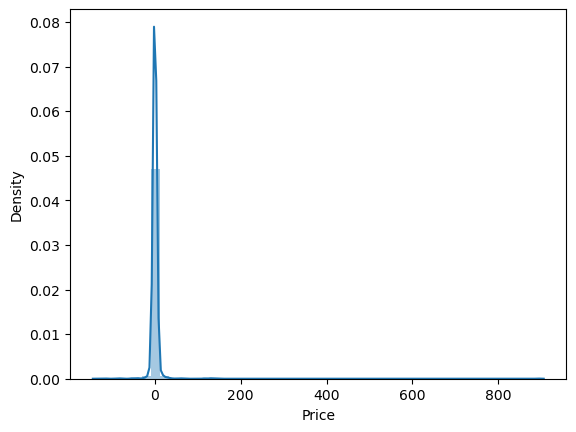

In [340]:
predict(RandomForestRegressor())

In [345]:
from sklearn.tree import DecisionTreeRegressor

Training score: 1.0
Predictions are: [16666.  4959.  9187. ...  3419.  5797.  6818.]


r2 score: 0.9999835825670615
MAE: 2.313365780606514
MSE score: 319.6080119805316
RMSE score: 17.877584064423573
MAPE score: 0.019294241296933592


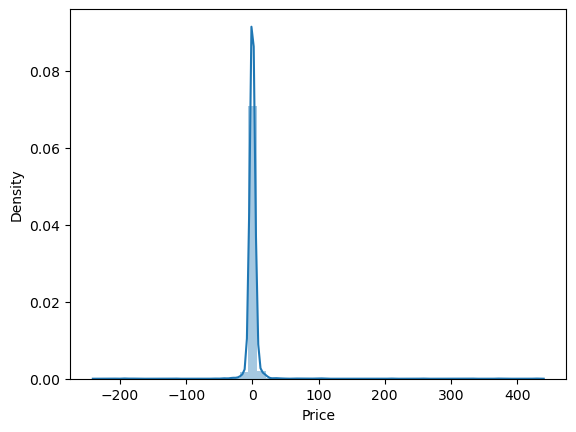

In [347]:
predict(DecisionTreeRegressor())

In [356]:
RandomForestRegressor()

RandomForestRegressor()

In [352]:
from sklearn.model_selection import RandomizedSearchCV

In [360]:
reg_rf= RandomForestRegressor()

In [405]:
np.linspace(start=100, stop=1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [407]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]

max_features = ["auto" , "sqrt"]

max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

min_samples_split = [5,10,15,100]

In [417]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}    
    

In [419]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [421]:
rf_random = RandomizedSearchCV(estimator = reg_rf , param_distributions = random_grid , cv = 3, n_jobs = -1 , verbose = 2)

In [423]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [426]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [428]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=10,
                      n_estimators=760)

In [430]:
rf_random.best_score_

0.9039856942366576